# Proyek Analisis Data: Nama dataset
- Nama: M. Riziq Sirfatullah Alfarizi
- Email: aden3965@gmail.com
- Id Dicoding: riziq_sa

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Bagaimana tren Bike-sharing rental selama tahun 2011-2012?
- pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah sepeda yang disewa antara tahun 2011 dan 2012?
- pertanyaan 3: Bagaimana jumlah pengguna casual dan registered dari setiap musim?
- pertanyaan 4: Bagaimana distribusi Bike-sharing rental sepeda berdasarkan jam dalam sehari?
- pertanyaan 5: Apakah terdapat korelasi antara suhu atau kecepatan angin dengan jumlah sepeda yang disewa?

## Menyaipkan semua library yang dibuthkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# mengupload dataset "Bike Sharing Dataset", tapi saya disini hanya menggunakan satu file yaitu file "hour.csv"
from google.colab import files
uploaded = files.upload()

In [6]:
# menbaca file "hour.csv"
bike_df = pd.read_csv("hour.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data hour.csv

In [7]:
#melihat info data dari data bike_df
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terlihat tidak ada mising value,

tetapi ada keanehan pada columns dteday. yang seharusnya tipe datanya date bukan object
***

In [8]:
#Melihat duplikasi data
print("duplikasi data: ", bike_df.duplicated().sum())

duplikasi data:  0


terlihat tidak ada duplikat data
***


In [9]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
# mengganti tipe data pada dteday menjadi datetime
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
# Mengganti label musim, supaya nanti tidak bingung
bike_df['season'] = bike_df['season'].replace({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})


## Exploratory Data Analysis (EDA)

### Explore bike_df

In [13]:
# Melihat program berbagi sepeda
# Melihat jumlah pengguna(casual) dan registered dari setiap Tahun
bike_df.groupby(by='yr')[['cnt', 'casual', 'registered']].sum()

,cnt,casual,registered
yr,,,
0,1243103,247252,995851
1,2049576,372765,1676811


keterangan  (0: 2011, 1:2012)

terlihat di tahun 2012 jumlah pengguna casual dan registered terbanyak dari pada tahun 2011
***

In [14]:
# Melihat rata-rata pengguna(casual) dan registered dari setiap Tahun
bike_df.groupby(by='yr')[['cnt', 'casual', 'registered']].mean()

,cnt,casual,registered
yr,,,
0,143.794448,28.600578,115.193869
1,234.666361,42.679757,191.986604


In [15]:
# Melihat jumlah pengguna dan registered dari setiap musim
sum_df = bike_df.groupby(by='season')[['cnt', 'casual', 'registered']].sum()
# Mengurutkan hasil berdasarkan jumlah sepeda yang disewakan (cnt) secara descending
result = sum_df.sort_values(by='cnt', ascending=False)
print(result)

            cnt  casual  registered
season                             
Gugur   1061129  226091      835038
Panas    918589  203522      715067
Dingin   841613  129782      711831
Semi     471348   60622      410726


terlihat banyaknya  pengguna casual dan registered di musim gugur.
dan yang terkecil ada di musim semi

In [16]:
# Melihat rata-rata pengguna dan registered dari setiap musim
mean_df = bike_df.groupby(by='season')[['cnt', 'casual', 'registered']].mean()

# Mengurutkan hasil berdasarkan jumlah sepeda yang disewakan (cnt) secara descending
result_df = mean_df.sort_values(by='cnt', ascending=False)
print(result_df)

               cnt     casual  registered
season                                   
Gugur   236.016237  50.287144  185.729093
Panas   208.344069  46.160581  162.183488
Dingin  198.868856  30.666824  168.202032
Semi    111.114569  14.290901   96.823668


In [17]:
# Melihat rata-rata pengguna dan registered dari setiap hours(jam)
bike_df.groupby('hr')['cnt'].mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

In [18]:
# melihat Korelasi antara 'temp', 'atemp', 'hum', 'windspeed' dengan jumlah sepeda yang disewa
Korelasi_df = bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi antara faktor lingkungan dan jumlah sepeda yang disewa:")
print(Korelasi_df)

Korelasi antara faktor lingkungan dan jumlah sepeda yang disewa:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


Suhu (temp): Korelasi positif kuat (0.40), menunjukkan hubungan positif antara suhu dan jumlah sepeda yang disewa (cnt).

Feeling Temperature (atemp): Korelasi positif kuat (0.40), menunjukkan hubungan positif antara persepsi suhu dan jumlah sepeda yang disewa (cnt).

Humidity (hum): Korelasi negatif sedang (-0.32), menunjukkan hubungan negatif antara kelembaban dan jumlah sepeda yang disewa (cnt).

Wind Speed (windspeed): Korelasi positif rendah (0.09), menunjukkan hubungan positif yang lemah antara kecepatan angin dan jumlah sepeda yang disewa (cnt).

## Visualization & Explanatory Analysis

### pertanyaan 1: Bagaimana tren  penyewaan sepeda selama tahun 2011-2012?

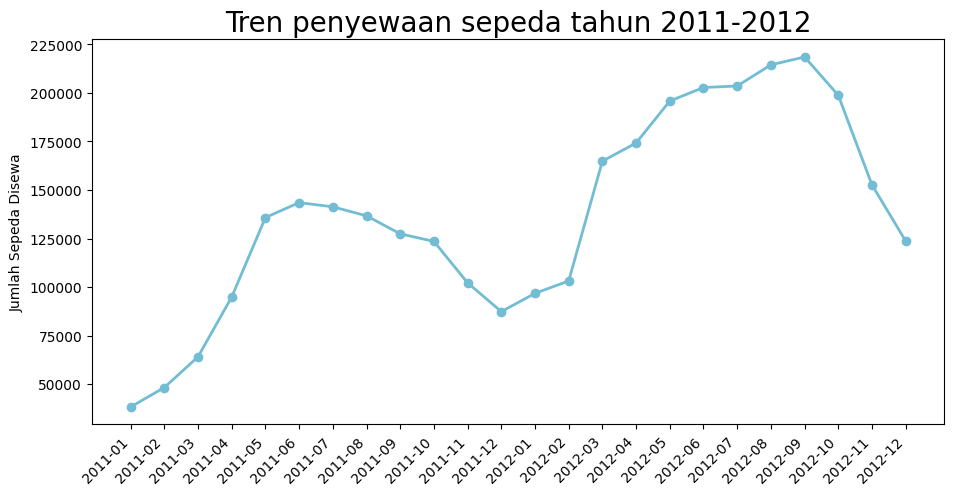

In [19]:
# Tren Penyewaan Sepeda dari tahun 2011-2012
trend_bike_df = bike_df.groupby(bike_df['dteday'].dt.to_period("M"))['cnt'].sum()
trend_bike_df = trend_bike_df.sort_index()

plt.figure(figsize=(11, 5))
plt.title("Tren penyewaan sepeda tahun 2011-2012", loc="center", fontsize=20)
plt.plot(trend_bike_df.index.astype(str), trend_bike_df.values, marker='o', linewidth=2, color="#72BCD4")
plt.xlabel(None)
plt.ylabel('Jumlah Sepeda Disewa')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah sepeda yang disewa antara tahun 2011 dan 2012?




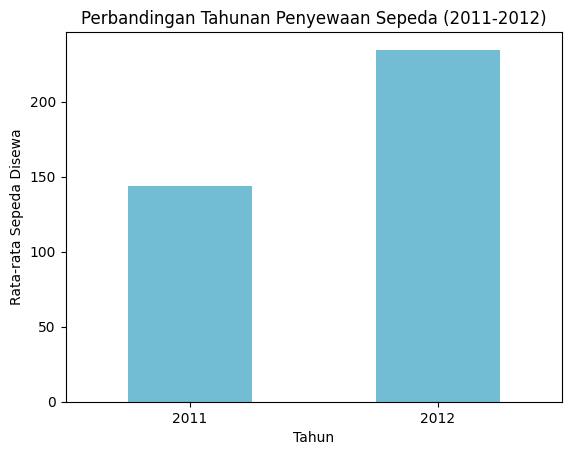

In [20]:
# Perbandingan Tahun 2011 dan 2012
perbandingan_df = bike_df.groupby('yr')['cnt'].mean()
perbandingan_df.plot(kind='bar',color="#72BCD4",title=('Perbandingan Tahunan Penyewaan Sepeda (2011-2012)'))
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Sepeda Disewa')
plt.xticks(ticks=[0, 1], labels=['2011', '2012'], rotation=0)  # Mengganti label tahun
plt.show()

### Pertanyaan 3: Bagaimana jumlah pengguna casual dan registered dari setiap musim??


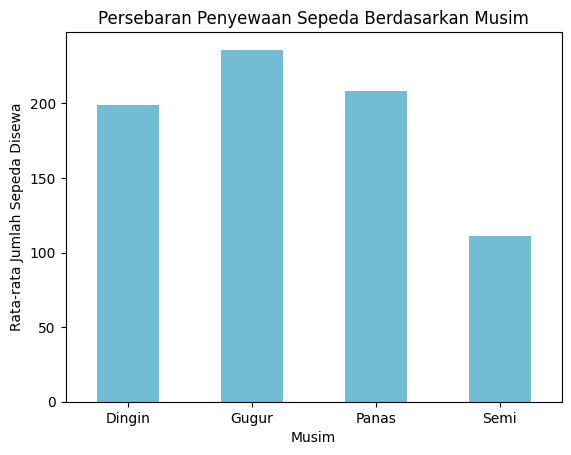

In [21]:
musim_bike_df = bike_df.groupby('season')['cnt'].mean()
musim_bike_df.plot(kind='bar',color="#72BCD4",title='Persebaran Penyewaan Sepeda Berdasarkan Musim' )
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sepeda Disewa')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

pertanyaan 5: Apakah terdapat korelasi antara suhu atau kecepatan angin dengan jumlah sepeda yang disewa?

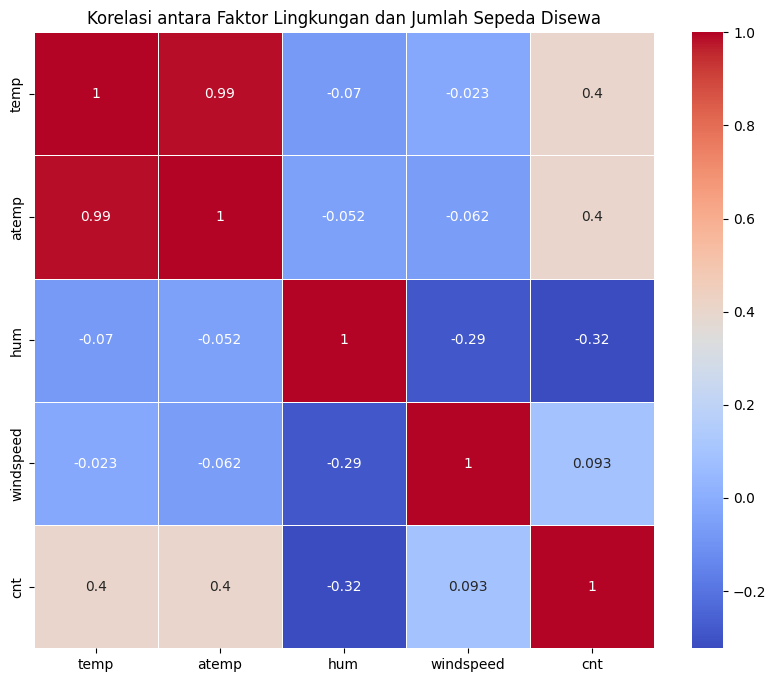

In [22]:
# Visualisasi korelasi
korelasi_bike_df = bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_bike_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasi antara Faktor Lingkungan dan Jumlah Sepeda Disewa')
plt.show()

### pertanyaan 5: Bagaimana distribusi Bike-sharing rental sepeda berdasarkan jam dalam sehari?

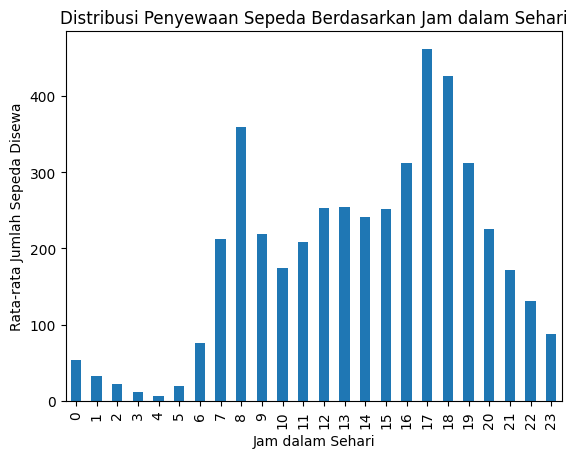

In [23]:
hourly_distribution = bike_df.groupby('hr')['cnt'].mean()
hourly_distribution.plot(kind='bar', title='Distribusi Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sepeda Disewa')
plt.show()

## Conclusion

- Conclution pertanyaan 1: terlihat tren penyewaan sepeda dari tahun 2011-2012 ini mengalami kenaikan dari pada tahun 2011 bulan januari(01) sampai dengan juni (06), dan mengamlami sedikit penurunan pada tahun 2011 bulan juni(06) sampai akhir tahun 2011 bulan desember, dan mengamali kenaikan yang sangat signifikan pada awal tahun 2012 kemudia mengalami penurunan kembali di akhir tahun 2012. terlihat juga ada pola kenaikan dan penurunan dalam akhir tahun hal ini karena ada pergantian musim.
***
- conclution pertanyaan 2: terlihat ada perbedaan signifikan dalam jumlah sepeda yang disewa antara tahun 2011 dan 2012.
***
- conclution pertanyaan 3: terlihat banyaknya pengguna casual dan registered di musim gugur. dan yang terkecil ada di musim semi
***
- conclution pertanyaan 4:
  Suhu (temp): Korelasi positif kuat (0.40), menunjukkan hubungan positif antara suhu dan jumlah sepeda yang disewa (cnt).

  Feeling Temperature (atemp): Korelasi positif kuat (0.40), menunjukkan hubungan positif antara persepsi suhu dan jumlah sepeda yang disewa (cnt).

  Humidity (hum): Korelasi negatif sedang (-0.32), menunjukkan hubungan negatif antara kelembaban dan jumlah sepeda yang disewa (cnt).

  Wind Speed (windspeed): Korelasi positif rendah (0.09), menunjukkan hubungan positif yang lemah antara kecepatan angin dan jumlah sepeda yang disewa (cnt).
***
- conclution pertanyaan 5: terlihat pada jam 17.00 banyak sekali sepeda yang disewa, hal ini berarti rata-rata pengguna menyewa sepeda pada malam hari antara jam 16.00 - 19.00. dan pada jam 20.00 malam terlihat mengalami penurunan secara drastis.
  
  sedangkan di pagi hari, terlihat di jam 8 pagi banyak sekali pengguna menyewa sepeda hal ini karena kebanyakan manusia di jam 8 pagi akan pergi sekola atau bekerja

In [25]:
bike_df.to_csv("bike_df.csv", index=False)